In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt

Importation du csv dans un dataframe

In [5]:
df_ = pd.read_csv('../dataset/rfm_2009-2010.csv', index_col='Customer ID')
df_2009_2010 = df_.copy()

In [6]:
df_2009_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4411 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TotalInvoices           4411 non-null   int64  
 1   TotalQuantity           4411 non-null   int64  
 2   TotalPrice              4411 non-null   float64
 3   Recency                 4411 non-null   int64  
 4   CancellationPercentage  4411 non-null   float64
 5   AvgItemsPerOrder        4411 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 241.2 KB


In [7]:
df_2009_2010.describe()

,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,5.529812,1237.172977,1941.470579,99.202675,4.362482,209.041138
std,10.405310,6232.787992,8646.164289,99.797324,14.033592,1419.811723
min,1.000000,-1535.000000,-25111.090000,0.000000,0.000000,-393.000000
25%,1.000000,145.000000,285.570000,26.500000,0.000000,72.000000
50%,3.000000,370.000000,664.001000,60.000000,0.000000,124.600000
75%,6.000000,970.500000,1666.225000,143.500000,2.816901,213.600000
max,278.000000,218090.000000,341776.730000,387.000000,100.000000,87167.000000


### Normalisation des données

In [8]:
from sklearn.preprocessing import StandardScaler

# Normaliser les valeurs RFM
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(df_2009_2010)

### Nombre de clusters : méthode du coude

In [9]:
# from kneed import KneeLocator

# inertias = []

# for n_clusters in range(1, 30):
#     kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
#     kmeans.fit(rfm_normalized)
#     inertias.append(kmeans.inertia_)

# knee = KneeLocator(range(1, 30), inertias, curve="convex", direction="decreasing")

# plt.plot(range(1, 30), inertias, marker='o')
# plt.title("Méthode du Coude")
# plt.xlabel("Nombre de Clusters")
# plt.ylabel("Inertie")
# plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label='Coude')
# plt.legend()
# plt.show()

# print("Nombre de clusters détecté:", knee.elbow)

### Application du clustering (avec K-means)

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

### Réduction de dimension avec T-SNE

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(rfm_normalized)

### Visualisation des clusters ave T-SNE

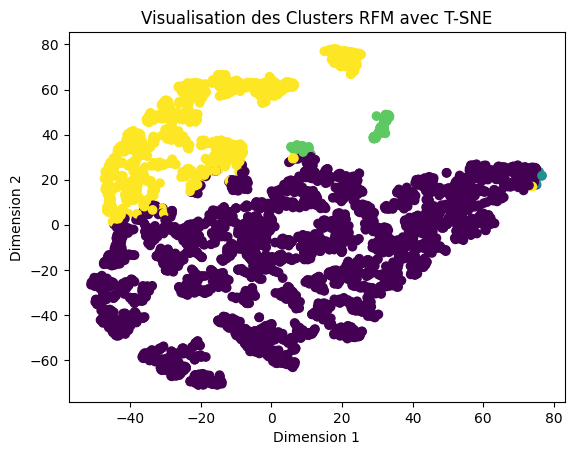

In [12]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap="viridis")
plt.title("Visualisation des Clusters RFM avec T-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


## PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(rfm_normalized)

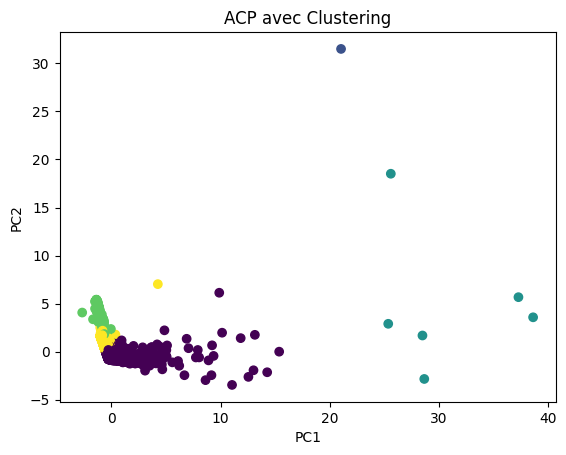

In [14]:
# Scatter plot des composantes principales avec une couleur pour chaque cluster
plt.scatter(pca_data[:,0],pca_data[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec Clustering')
plt.show()

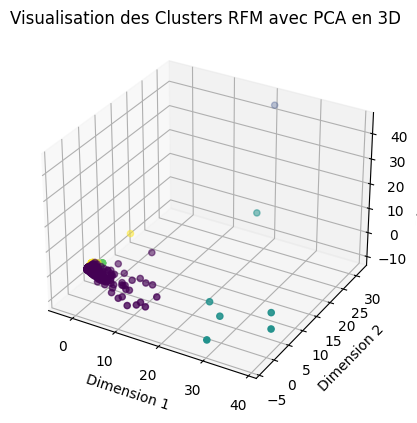

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters, cmap='viridis')
ax.set_title("Visualisation des Clusters RFM avec PCA en 3D")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()


In [16]:
import numpy as np

# Obtention du nombre de points par cluster
nombre_points_par_cluster = np.bincount(kmeans.labels_)

# Affichage des résultats
for cluster, nombre_points in enumerate(nombre_points_par_cluster):
    print(f"Cluster {cluster}: {nombre_points} points")


Cluster 0: 3278 points
Cluster 1: 1 points
Cluster 2: 6 points
Cluster 3: 108 points
Cluster 4: 1018 points


In [17]:
# Filtrer les clients du cluster 1
cluster_1_clients = df_2009_2010[kmeans.labels_ == 1]
cluster_1_clients


,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
Customer ID,,,,,,
13687,1,87167,11880.84,86,0.0,87167.0


In [18]:
# Filtrer les clients du cluster 2
cluster_2_clients = df_2009_2010[kmeans.labels_ == 2]
cluster_2_clients

,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
Customer ID,,,,,,
13694,107,126479,130215.34,3,1.676529,1182.046729
13902,8,218090,30411.26,281,5.970149,27261.250000
14156,138,106883,183163.55,20,2.289513,774.514493
14646,89,175151,252444.93,2,1.654216,1967.988764
14911,278,67523,140056.31,0,2.814259,242.888489
18102,95,122988,341776.73,14,1.259843,1294.610526


Les clients des clusters 1 et 2 sont trop peu nombreux et trop éloignes des autres clusters, on supprime les lignes correspondante (il faudrait une analyse métier plus approfondie pour déterminer s'il s'agit de valeurs abérrantes)

In [19]:
df_2009_2010 = df_2009_2010.drop(cluster_1_clients.index)
df_2009_2010 = df_2009_2010.drop(cluster_2_clients.index)

On relance le clustering avec 3 clusters

In [20]:
from sklearn.preprocessing import StandardScaler

# Normaliser les valeurs RFM
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(df_2009_2010)

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(rfm_normalized)


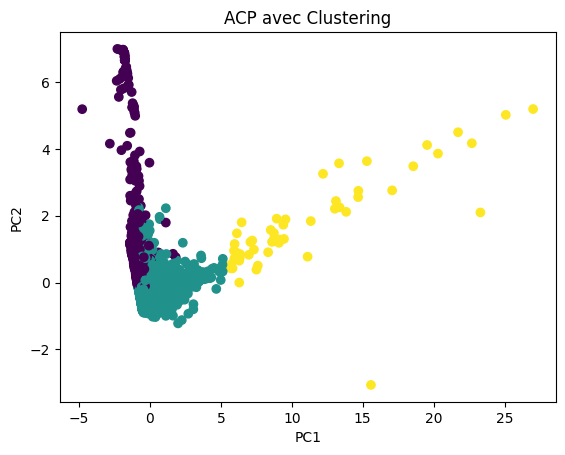

In [23]:
# Scatter plot des composantes principales avec une couleur pour chaque cluster
plt.scatter(pca_data[:,0],pca_data[:,1], c=kmeans.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec Clustering')
plt.show()

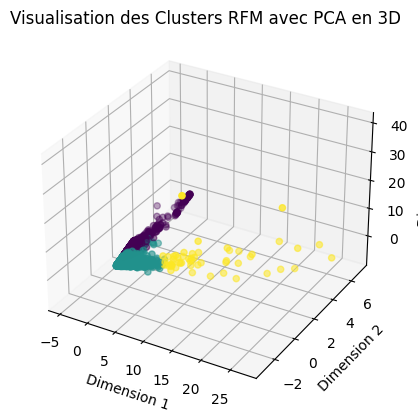

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters, cmap='viridis')
ax.set_title("Visualisation des Clusters RFM avec PCA en 3D")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()

In [25]:
# Obtention du nombre de points par cluster
nombre_points_par_cluster = np.bincount(kmeans.labels_)

# Affichage des résultats
for cluster, nombre_points in enumerate(nombre_points_par_cluster):
    print(f"Cluster {cluster}: {nombre_points} points")


Cluster 0: 1077 points
Cluster 1: 3272 points
Cluster 2: 55 points


In [26]:
grouped_df = df_2009_2010.groupby(kmeans.labels_)
cluster_stats = grouped_df.agg(['count', 'mean', 'std', 'min', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75), 'max'])
cluster_stats

TotalInvoices                                                             \
          count       mean        std min <lambda_0> <lambda_1> <lambda_2>   
0          1077   1.906221   1.577469   1        1.0        1.0        2.0   
1          3272   5.687958   5.935411   1        2.0        4.0        7.0   
2            55  54.763636  41.929378   1       30.0       44.0       66.5   

       TotalQuantity                ... CancellationPercentage              \
   max         count          mean  ...             <lambda_2>         max   
0   13          1077    232.933148  ...               4.000000  100.000000   
1   66          3272    961.540342  ...               2.633315   50.000000   
2  178            55  21015.636364  ...               7.168916   24.175824   

  AvgItemsPerOrder                                                    \
             count         mean          std         min  <lambda_0>   
0             1077   131.977394   165.706092 -393.000000   39.500000   
1             3272   183.178713   193.388385    0.000000   82.000000   
2               55  1103.450168  2675.184057   40.830357  211.183453   

                                    
   <lambda_1>  <lambda_2>      max  
0   89.000000  167.000000   1658.0  
1  133.933333  220.000000   3199.0  
2  323.516129  897.855294  17766.0  

[3 rows x 48 columns]

In [27]:
cluster_mean = grouped_df.mean()
cluster_mean

,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
0,1.906221,232.933148,323.347849,252.470752,10.311052,131.977394
1,5.687958,961.540342,1662.870736,50.167482,2.391496,183.178713
2,54.763636,21015.636364,30631.256055,20.327273,5.404859,1103.450168


In [28]:
# Création d'un dictionnaire pour stocker les plages de valeurs
ranges = {}

# Boucle sur les colonnes du DataFrame cluster_stats
for column in cluster_stats.columns.levels[0]:
    # Récupération des statistiques de la colonne
    column_stats = cluster_stats[column]
    
    # Calcul des plages en fonction des statistiques
    min_val = column_stats['min'].min()
    max_val = column_stats['max'].max()
    
    # Ajout de la plage au dictionnaire
    ranges[column] = (min_val, max_val)

# Affichage des plages de valeurs
for column, value_range in ranges.items():
    print(f"{column}: {value_range}")


TotalInvoices: (1, 178)
TotalQuantity: (-1535, 75823)
TotalPrice: (-25111.09, 90683.9)
Recency: (0, 387)
CancellationPercentage: (0.0, 100.0)
AvgItemsPerOrder: (-393.0, 17766.0)


In [29]:
# Création d'un dictionnaire pour stocker les plages de valeurs
ranges = {}

# Boucle sur les colonnes du DataFrame cluster_stats
for column in cluster_stats.columns.levels[0]:
    # Récupération des statistiques de la colonne
    column_stats = cluster_stats[column]
    
    # Calcul des plages en fonction des statistiques
    min_val = column_stats['min'].min()
    max_val = column_stats['max'].max()
    
    # Ajout de la plage au dictionnaire
    ranges[column] = (min_val, max_val)

# Fonction de mise à l'échelle min-max
def scale_value(value, min_val, max_val):
    scaled_value = (value - min_val) / (max_val - min_val) * 3
    return scaled_value

# Création d'un nouveau DataFrame pour stocker les moyennes normalisées
normalized_cluster_stats = pd.DataFrame(columns=cluster_stats.columns.levels[0])

# Boucle sur les colonnes
for column in cluster_stats.columns.levels[0]:
    # Récupération des valeurs min et max de la colonne
    min_val = ranges[column][0]
    max_val = ranges[column][1]
    
    # Calcul de la moyenne normalisée de la colonne
    scaled_mean = scale_value(cluster_stats[column]['mean'], min_val, max_val)
    
    # Ajout de la moyenne normalisée au nouveau DataFrame
    normalized_cluster_stats[column] = scaled_mean

# Affichage du nouveau DataFrame avec les moyennes normalisées
normalized_cluster_stats


,TotalInvoices,TotalQuantity,TotalPrice,Recency,CancellationPercentage,AvgItemsPerOrder
0,0.015360,0.068562,0.658952,1.957138,0.309332,0.086730
1,0.079457,0.096818,0.693656,0.388895,0.071745,0.095189
2,0.911248,0.874530,1.444165,0.157576,0.162146,0.247225


In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Liste des clusters
clusters = normalized_cluster_stats.index.tolist()

# Création des sous-plots
fig = make_subplots(rows=2, cols=3, subplot_titles=clusters, specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}], [{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]])

# Parcours des clusters et création des radar plots pour la première ligne
for i, cluster in enumerate(clusters[:3]):
    data = normalized_cluster_stats.loc[cluster].values.tolist()
    labels = normalized_cluster_stats.columns.tolist()
    
    fig.add_trace(
        go.Scatterpolar(
            r=data,
            theta=labels,
            fill='toself',
            name=cluster
        ),
        row=1,
        col=i+1
    )

# Parcours des clusters et création des radar plots pour la deuxième ligne
for i, cluster in enumerate(clusters[3:]):
    data = normalized_cluster_stats.loc[cluster].values.tolist()
    labels = normalized_cluster_stats.columns.tolist()
    
    fig.add_trace(
        go.Scatterpolar(
            r=data,
            theta=labels,
            fill='toself',
            name=cluster
        ),
        row=2,
        col=i+1
    )

# Mise en forme du layout
for row in range(1, 3):
    for col in range(1, 4):
        fig.update_polars(
            row=row,
            col=col,
            radialaxis=dict(
                visible=True,
                range=[0, 3],  # Ajuster la plage en fonction de 0 à 3
                tickvals=[0, 1, 2, 3],  # Valeurs entières pour les ticks
                ticktext=['0', '1', '2', '3']  # Étiquettes des ticks en tant que valeurs entières
            )
        )

fig.update_layout(
    showlegend=False,
    title_text='Radar Plots par Cluster',
    height=800,  # Ajuster la hauteur de la figure
    width=1200  # Ajuster la largeur de la figure
)

# Affichage du graphique
fig.show()
